In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
# Function to calculate Euclidean distance
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to perform K-Means clustering
def kmeans(data, k, max_iterations):
    # Initialize centroids randomly from the data points
    centroids = data[np.random.choice(len(data), k, replace=False)]
    assignments = np.zeros(len(data))

    for _ in range(max_iterations):
        # Assign each point to the nearest centroid
        for i, point in enumerate(data):
            distances_to_centroids = [distance(point, centroid) for centroid in centroids]
            assignments[i] = np.argmin(distances_to_centroids)

        # Update centroids based on mean of assigned points
        for cluster in range(k):
            cluster_data = data[assignments == cluster]
            if len(cluster_data) > 0:  # Avoid division by zero
                centroids[cluster] = np.mean(cluster_data, axis=0)

    return centroids, assignments

In [6]:


# Load the Iris dataset
data = pd.read_csv("iris.csv")

# Convert features to a numpy array
X = data.iloc[:, :-1].values

# Define number of clusters and maximum iterations
k = 3
max_iterations = 100

# Perform K-Means clustering
centroids, assignments = kmeans(X, k, max_iterations)

# Organize data into clusters
clustered_data = []
for i in range(k):
    clustered_data.append(X[assignments == i])

# Print data points for each cluster
for i in range(k):
    print(f"\nCluster {i+1} data points:")
    print(data.iloc[np.where(assignments == i)[0]])




Cluster 1 data points:
     sepal_length  sepal_width  petal_length  petal_width     species
50            7.0          3.2           4.7          1.4  versicolor
52            6.9          3.1           4.9          1.5  versicolor
77            6.7          3.0           5.0          1.7  versicolor
100           6.3          3.3           6.0          2.5   virginica
102           7.1          3.0           5.9          2.1   virginica
103           6.3          2.9           5.6          1.8   virginica
104           6.5          3.0           5.8          2.2   virginica
105           7.6          3.0           6.6          2.1   virginica
107           7.3          2.9           6.3          1.8   virginica
108           6.7          2.5           5.8          1.8   virginica
109           7.2          3.6           6.1          2.5   virginica
110           6.5          3.2           5.1          2.0   virginica
111           6.4          2.7           5.3          1.9   virgin

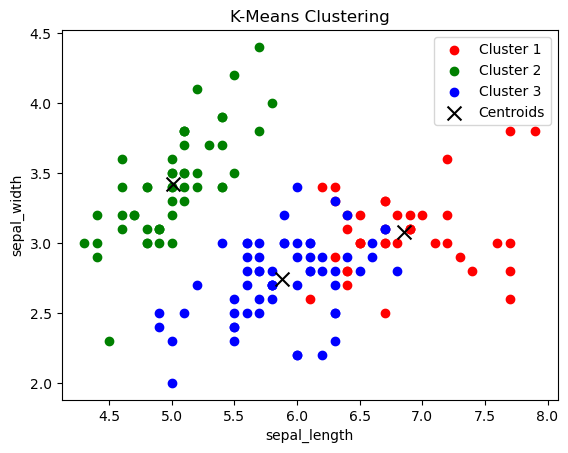

In [8]:
# Visualize the clusters
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

# Label axes and add title
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("K-Means Clustering")
plt.legend()
plt.show()